In [1]:
from keras.utils import to_categorical
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from matplotlib import image
from matplotlib import pyplot
import pandas as pd
from keras.utils import to_categorical
from keras import layers
from keras import models
from keras import regularizers
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import matplotlib.pyplot as plt


Using TensorFlow backend.


### Load Test Dataframe

In [2]:
df = pd.read_csv('Test.csv')

### Generate Images From Directory

In [3]:
# Path Directory
train_data_dir = '../Mod 6 Project/Data/Train'
test_data_dir = '../Mod 6 Project/Data/Test'

In [4]:
# Train batches
train_batches = ImageDataGenerator(rescale=1./255).flow_from_directory(
                    train_data_dir,
                    target_size=(64,64),
                    classes=[str(i) for i in np.arange(43)],
                    batch_size=39209)
# Test batches
test_batches = ImageDataGenerator(rescale=1./255).flow_from_directory(
                    test_data_dir,
                    target_size=(64,64),
                    classes=[],
                    batch_size=12630)

Found 39209 images belonging to 43 classes.
Found 12630 images belonging to 1 classes.


In [5]:
# Extract train/test batch sequences
train_data, train_labels = next(train_batches)
test_data, test_labels = next(test_batches)

In [6]:
print('test data: {}'.format(test_data.shape))
print('test label: {}'.format(test_labels.shape))
print('train data: {}'.format(train_data.shape))
print('train label: {}'.format(train_labels.shape))

test data: (12630, 64, 64, 3)
test label: (12630, 1)
train data: (39209, 64, 64, 3)
train label: (39209, 43)


## Reshaping Train and Test Labels from 1 to 43 Columns

In [7]:
# train labels
train_labels = np.array([list(img).index(1.0) for img in train_labels])

In [8]:
# test labels
path_test = [int(i.replace('Test/','').replace('.png','')) for i in list(df['Path'])] # remove 'Test/','.png'
id_test = list(df['ClassId'])
path_id = dict(zip(path_test, id_test)) # tuple of path, id
labels = [path_id[batch] for batch in list(test_batches.index_array)]
test_labels = np.array(labels)

In [9]:
print('test label: {}'.format(test_labels.shape))
print('train label: {}'.format(train_labels.shape))

test label: (12630,)
train label: (39209,)


In [10]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [11]:
print('test label: {}'.format(test_labels.shape))
print('train label: {}'.format(train_labels.shape))

test label: (12630, 43)
train label: (39209, 43)


In [13]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
print(f'baseline classification rate: {float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)}')

baseline classification rate: 41.07220902612826


## Baseline

In [56]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(43, activation='softmax'))

model.compile(optimizer='RMSprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

x_val = train_data[:3000]
partial_x_train = train_data[3000:]

y_val = train_labels[:3000]
partial_y_train = train_labels[3000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=750,
                    validation_data=(x_val, y_val))

Train on 36209 samples, validate on 3000 samples
Epoch 1/5
36209/36209 [==============================] - 172s 5ms/step - loss: 3.1252 - accuracy: 0.2144 - val_loss: 2.2024 - val_accuracy: 0.3867
Epoch 2/5
36209/36209 [==============================] - 177s 5ms/step - loss: 1.6892 - accuracy: 0.5257 - val_loss: 1.1979 - val_accuracy: 0.6470
Epoch 3/5
36209/36209 [==============================] - 178s 5ms/step - loss: 0.8464 - accuracy: 0.7578 - val_loss: 0.5001 - val_accuracy: 0.8537
Epoch 4/5
36209/36209 [==============================] - 180s 5ms/step - loss: 0.4307 - accuracy: 0.8791 - val_loss: 0.5607 - val_accuracy: 0.8360
Epoch 5/5
36209/36209 [==============================] - 178s 5ms/step - loss: 0.2183 - accuracy: 0.9413 - val_loss: 0.2003 - val_accuracy: 0.9390


In [57]:
test_loss, test_acc = my_model.evaluate(test_data, test_labels)
print('Test accuracy: {}'.format(test_acc))

12630/12630 [==============================] - 11s 879us/step
Test accuracy: 0.9026920199394226


In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

predictions = my_model.predict(test_data)
predictions = np.around(predictions)
f1_score = f1_score(test_labels, predictions, average='micro')
print('f1 score: {}'.format(f1_score))

f1 score: 0.9052361066495342


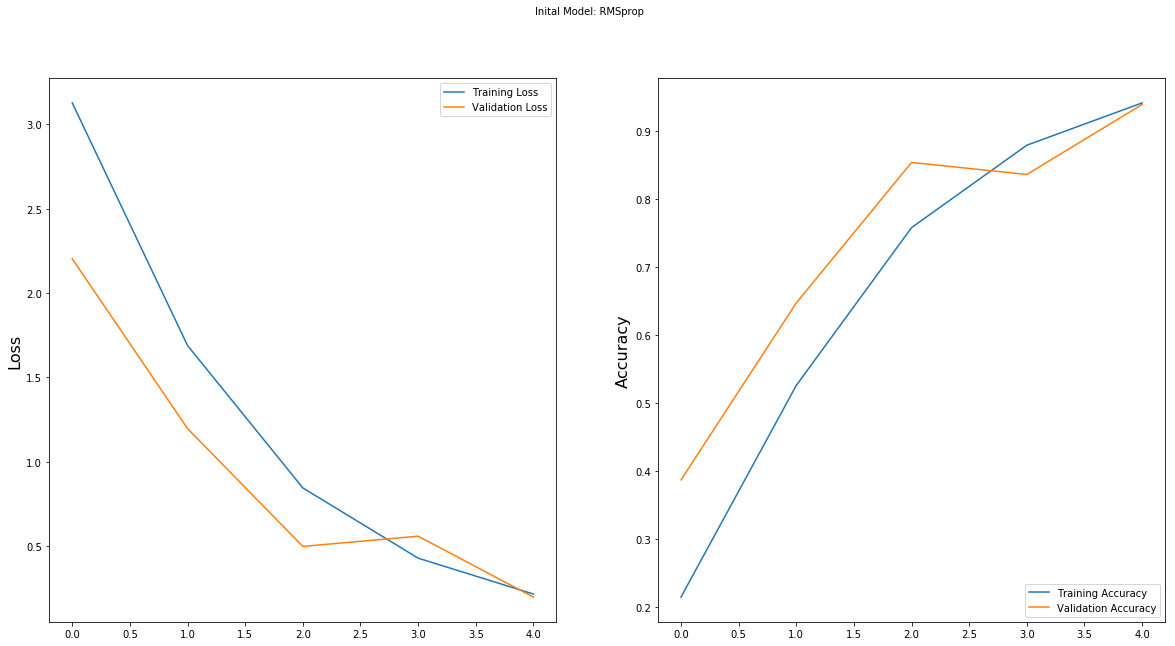

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Inital Model: RMSprop', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

predictions = my_model.predict(test_data)
predictions = np.around(predictions)
f1_score = f1_score(test_labels, predictions, average='micro')
print('f1 score: {}'.format(f1_score))

f1 score: 0.9052361066495342


### RMSPROP optimizer - 5layer

In [38]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(43, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

x_val = train_data[:3000]
partial_x_train = train_data[3000:]

y_val = train_labels[:3000]
partial_y_train = train_labels[3000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=250,
                    validation_data=(x_val, y_val))

Train on 36209 samples, validate on 3000 samples
Epoch 1/20
36209/36209 [==============================] - 250s 7ms/step - loss: 1.9841 - accuracy: 0.4592 - val_loss: 1.0113 - val_accuracy: 0.7027
Epoch 2/20
36209/36209 [==============================] - 208s 6ms/step - loss: 0.4089 - accuracy: 0.8824 - val_loss: 0.1797 - val_accuracy: 0.9550
Epoch 3/20
36209/36209 [==============================] - 179s 5ms/step - loss: 0.1331 - accuracy: 0.9637 - val_loss: 0.0983 - val_accuracy: 0.9770
Epoch 4/20
36209/36209 [==============================] - 179s 5ms/step - loss: 0.0596 - accuracy: 0.9837 - val_loss: 0.0745 - val_accuracy: 0.9833
Epoch 5/20
36209/36209 [==============================] - 181s 5ms/step - loss: 0.0361 - accuracy: 0.9908 - val_loss: 0.0546 - val_accuracy: 0.9910
Epoch 6/20
36209/36209 [==============================] - 197s 5ms/step - loss: 0.0215 - accuracy: 0.9946 - val_loss: 0.0584 - val_accuracy: 0.9900
Epoch 7/20
36209/36209 [==============================] - 187s 

In [40]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy: {}'.format(test_acc))

12630/12630 [==============================] - 22s 2ms/step
Test accuracy: 0.955898642539978


In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

predictions = model.predict(test_data)
predictions = np.around(predictions)
f1_score = f1_score(test_labels, predictions, average='micro')
print('f1 score: {}'.format(f1_score))

f1 score: 0.9567769053850425


In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : RMSprop', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

NameError: name 'history' is not defined

### Adam 

In [97]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(43, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

x_val = train_data[:3000]
partial_x_train = train_data[3000:]

y_val = train_labels[:3000]
partial_y_train = train_labels[3000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=15,
                    batch_size=150,
                    validation_data=(x_val, y_val))
test_loss, test_acc = model.evaluate(test_data, test_labels)

print('Test accuracy: {}'.format(test_acc))

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

predictions = model.predict(test_data)
predictions = np.around(predictions)
f1_score = f1_score(test_labels, predictions, average='micro')
print('f1 score: {}'.format(f1_score))

Train on 36209 samples, validate on 3000 samples
Epoch 1/15
36209/36209 [==============================] - 323s 9ms/step - loss: 1.9604 - accuracy: 0.4299 - val_loss: 0.5623 - val_accuracy: 0.8237
Epoch 2/15
36209/36209 [==============================] - 323s 9ms/step - loss: 0.2307 - accuracy: 0.9326 - val_loss: 0.0951 - val_accuracy: 0.9743
Epoch 3/15
36209/36209 [==============================] - 325s 9ms/step - loss: 0.0652 - accuracy: 0.9822 - val_loss: 0.0436 - val_accuracy: 0.9887
Epoch 4/15
36209/36209 [==============================] - 321s 9ms/step - loss: 0.0299 - accuracy: 0.9915 - val_loss: 0.0625 - val_accuracy: 0.9830
Epoch 5/15
36209/36209 [==============================] - 321s 9ms/step - loss: 0.0225 - accuracy: 0.9936 - val_loss: 0.0449 - val_accuracy: 0.9887
Epoch 6/15
36209/36209 [==============================] - 321s 9ms/step - loss: 0.0137 - accuracy: 0.9959 - val_loss: 0.0284 - val_accuracy: 0.9907
Epoch 7/15
36209/36209 [==============================] - 321s 

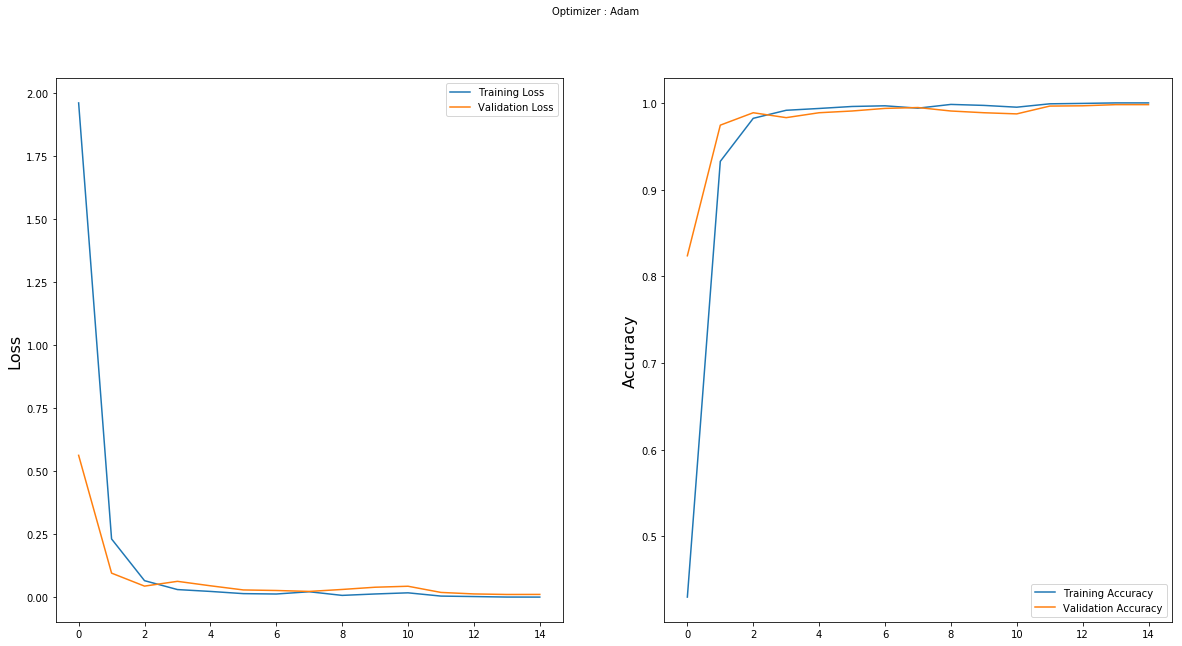

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()